In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df.to_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")

In [5]:
df.rename(columns={'tile_location_hd5': 'seg_fp'}, inplace=True)
df

tile_location  label  \
0         dataset/5x_plexus_kfold_v8/0_S00-1910.pt      0   
1      dataset/5x_plexus_kfold_v8/10000_S14-580.pt      1   
2      dataset/5x_plexus_kfold_v8/10001_S14-580.pt      1   
3      dataset/5x_plexus_kfold_v8/10002_S14-580.pt      0   
4      dataset/5x_plexus_kfold_v8/10003_S14-580.pt      0   
...                                            ...    ...   
14995  dataset/5x_plexus_kfold_v8/9998_S14-3414.pt      1   
14996  dataset/5x_plexus_kfold_v8/9999_S14-3414.pt      1   
14997     dataset/5x_plexus_kfold_v8/999_S01-18.pt      1   
14998    dataset/5x_plexus_kfold_v8/99_S00-1910.pt      1   
14999     dataset/5x_plexus_kfold_v8/9_S00-1910.pt      1   

                                                  seg_fp  
0      dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...  
1      dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...  
2      dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...  
3      dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...  
4      dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...  
...                                                  ...  
14995  dataset/5x_plexus_kfold_v8_hd5_final/9998_S14-...  
14996  dataset/5x_plexus_kfold_v8_hd5_final/9999_S14-...  
14997  dataset/5x_plexus_kfold_v8_hd5_final/999_S01-1...  
14998  dataset/5x_plexus_kfold_v8_hd5_final/99_S00-19...  
14999  dataset/5x_plexus_kfold_v8_hd5_final/9_S00-191...  

[15000 rows x 3 columns]

In [7]:
for num in range(len(df)):

    df.at[num, "slide_fp"] = "dataset/5x_images_segmentations_with_ganglia/" + df["tile_location"][num].split("/")[-1].split(".")[0].split("_")[-1] + ".pt"

df = df.loc[:, ~df.columns.str.contains("^Unnamed")]  
df.to_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
df

tile_location  label  \
0         dataset/5x_plexus_kfold_v8/0_S00-1910.pt      0   
1      dataset/5x_plexus_kfold_v8/10000_S14-580.pt      1   
2      dataset/5x_plexus_kfold_v8/10001_S14-580.pt      1   
3      dataset/5x_plexus_kfold_v8/10002_S14-580.pt      0   
4      dataset/5x_plexus_kfold_v8/10003_S14-580.pt      0   
...                                            ...    ...   
14995  dataset/5x_plexus_kfold_v8/9998_S14-3414.pt      1   
14996  dataset/5x_plexus_kfold_v8/9999_S14-3414.pt      1   
14997     dataset/5x_plexus_kfold_v8/999_S01-18.pt      1   
14998    dataset/5x_plexus_kfold_v8/99_S00-1910.pt      1   
14999     dataset/5x_plexus_kfold_v8/9_S00-1910.pt      1   

                                                  seg_fp  \
0      dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...   
1      dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...   
2      dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...   
3      dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...   
4      dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...   
...                                                  ...   
14995  dataset/5x_plexus_kfold_v8_hd5_final/9998_S14-...   
14996  dataset/5x_plexus_kfold_v8_hd5_final/9999_S14-...   
14997  dataset/5x_plexus_kfold_v8_hd5_final/999_S01-1...   
14998  dataset/5x_plexus_kfold_v8_hd5_final/99_S00-19...   
14999  dataset/5x_plexus_kfold_v8_hd5_final/9_S00-191...   

                                                slide_fp  
0      dataset/5x_images_segmentations_with_ganglia/S...  
1      dataset/5x_images_segmentations_with_ganglia/S...  
2      dataset/5x_images_segmentations_with_ganglia/S...  
3      dataset/5x_images_segmentations_with_ganglia/S...  
4      dataset/5x_images_segmentations_with_ganglia/S...  
...                                                  ...  
14995  dataset/5x_images_segmentations_with_ganglia/S...  
14996  dataset/5x_images_segmentations_with_ganglia/S...  
14997  dataset/5x_images_segmentations_with_ganglia/S...  
14998  dataset/5x_images_segmentations_with_ganglia/S...  
14999  dataset/5x_images_segmentations_with_ganglia/S...  

[15000 rows x 4 columns]

In [9]:
import torch
import h5py
import numpy as np
import pandas as pd
import os
from glob import glob

input_dir = "dataset/5x_images_segmentations_with_ganglia"
output_dir = "dataset/5x_images_segmentations_with_ganglia_hd5"
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")

pt_files = glob(os.path.join(input_dir, "*.pt"))

new_slide_fp = {}

for pt_file in pt_files:
    try:
        data = torch.load(pt_file)

        h5_file = os.path.join(output_dir, f"{os.path.basename(pt_file).replace('.pt', '.h5')}")

        with h5py.File(h5_file, "w") as f:
            for key, value in data.items():
                if isinstance(value, torch.Tensor):
                    value = value.numpy()
                f.create_dataset(key, data=value, compression="gzip")

        new_slide_fp[pt_file] = h5_file

        print(f"Converted {pt_file} -> {h5_file}")

    except Exception as e:
        print(f"Error processing {pt_file}: {e}")

df["slide_fp"] = df["slide_fp"].map(lambda x: new_slide_fp.get(x, x))
df.to_csv("dataset/labeled_tiles_v7_with_hd5.csv", index=False)

print("Conversion complete! Updated dataset saved.")

Converted dataset/5x_images_segmentations_with_ganglia\S00-1910.pt -> dataset/5x_images_segmentations_with_ganglia_hd5\S00-1910.h5
Converted dataset/5x_images_segmentations_with_ganglia\S01-18.pt -> dataset/5x_images_segmentations_with_ganglia_hd5\S01-18.h5
Converted dataset/5x_images_segmentations_with_ganglia\S02-410.pt -> dataset/5x_images_segmentations_with_ganglia_hd5\S02-410.h5
Converted dataset/5x_images_segmentations_with_ganglia\S02-484.pt -> dataset/5x_images_segmentations_with_ganglia_hd5\S02-484.h5
Converted dataset/5x_images_segmentations_with_ganglia\S03-2391.pt -> dataset/5x_images_segmentations_with_ganglia_hd5\S03-2391.h5
Converted dataset/5x_images_segmentations_with_ganglia\S03-3178 D2.pt -> dataset/5x_images_segmentations_with_ganglia_hd5\S03-3178 D2.h5
Converted dataset/5x_images_segmentations_with_ganglia\S03-3178 D3.pt -> dataset/5x_images_segmentations_with_ganglia_hd5\S03-3178 D3.h5
Converted dataset/5x_images_segmentations_with_ganglia\S03-3178 D4.pt -> datase

In [10]:
df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")

for num in range(len(df)):

    df.at[num, "slide_fp"] = "dataset/5x_images_segmentations_with_ganglia_hd5/" + df["slide_fp"][num].split("/")[-1].split(".")[0].split("_")[-1] + ".h5"

df = df.loc[:, ~df.columns.str.contains("^Unnamed")]  
df.to_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
df

tile_location  label  \
0         dataset/5x_plexus_kfold_v8/0_S00-1910.pt      0   
1      dataset/5x_plexus_kfold_v8/10000_S14-580.pt      1   
2      dataset/5x_plexus_kfold_v8/10001_S14-580.pt      1   
3      dataset/5x_plexus_kfold_v8/10002_S14-580.pt      0   
4      dataset/5x_plexus_kfold_v8/10003_S14-580.pt      0   
...                                            ...    ...   
14995  dataset/5x_plexus_kfold_v8/9998_S14-3414.pt      1   
14996  dataset/5x_plexus_kfold_v8/9999_S14-3414.pt      1   
14997     dataset/5x_plexus_kfold_v8/999_S01-18.pt      1   
14998    dataset/5x_plexus_kfold_v8/99_S00-1910.pt      1   
14999     dataset/5x_plexus_kfold_v8/9_S00-1910.pt      1   

                                                  seg_fp  \
0      dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...   
1      dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...   
2      dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...   
3      dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...   
4      dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...   
...                                                  ...   
14995  dataset/5x_plexus_kfold_v8_hd5_final/9998_S14-...   
14996  dataset/5x_plexus_kfold_v8_hd5_final/9999_S14-...   
14997  dataset/5x_plexus_kfold_v8_hd5_final/999_S01-1...   
14998  dataset/5x_plexus_kfold_v8_hd5_final/99_S00-19...   
14999  dataset/5x_plexus_kfold_v8_hd5_final/9_S00-191...   

                                                slide_fp  
0      dataset/5x_images_segmentations_with_ganglia_h...  
1      dataset/5x_images_segmentations_with_ganglia_h...  
2      dataset/5x_images_segmentations_with_ganglia_h...  
3      dataset/5x_images_segmentations_with_ganglia_h...  
4      dataset/5x_images_segmentations_with_ganglia_h...  
...                                                  ...  
14995  dataset/5x_images_segmentations_with_ganglia_h...  
14996  dataset/5x_images_segmentations_with_ganglia_h...  
14997  dataset/5x_images_segmentations_with_ganglia_h...  
14998  dataset/5x_images_segmentations_with_ganglia_h...  
14999  dataset/5x_images_segmentations_with_ganglia_h...  

[15000 rows x 4 columns]

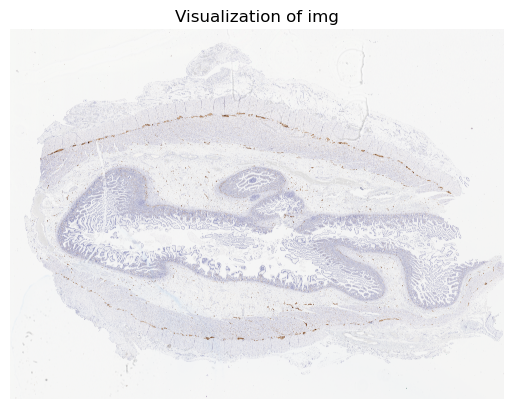

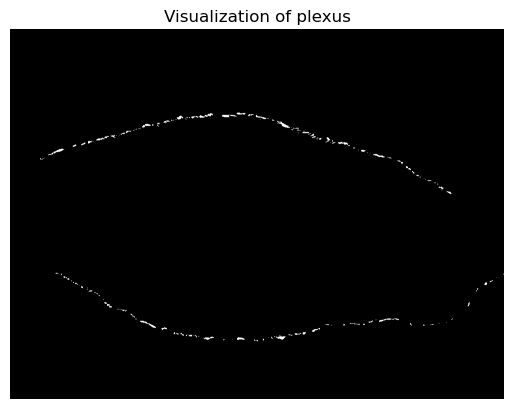

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

h5_file = df["slide_fp"][2]
key = "img"
key1 = "plexus"

with h5py.File(h5_file, "r") as f:
    data = f[key][:]
    data = np.transpose(data, (1, 2, 0))

    data1 = f[key1][:]
    data1 = np.transpose(data1, (1, 2, 0))

    plt.imshow(data, cmap='gray')
    plt.axis("off")
    plt.title(f"Visualization of {key}")
    plt.show()
    
    plt.imshow(data1, cmap='gray')
    plt.axis("off")
    plt.title(f"Visualization of {key1}")
    plt.show()


In [12]:
import h5py

file_path = "dataset/5x_images_segmentations_with_ganglia_hd5/S00-1910.h5" 

with h5py.File(file_path, "r") as f:
    print("Datasets and groups inside the H5 file:")
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, Shape: {obj.shape}, Dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")

    f.visititems(print_structure)

    print("\nAttributes in the root group:")
    for key, value in f.attrs.items():
        print(f"{key}: {value}")


Datasets and groups inside the H5 file:
Dataset: ganglia_certain, Shape: (1, 6553, 3996), Dtype: uint8
Dataset: ganglia_potential, Shape: (1, 6553, 3996), Dtype: uint8
Dataset: img, Shape: (3, 6553, 3996), Dtype: uint8
Dataset: muscle, Shape: (1, 6553, 3996), Dtype: uint8
Dataset: plexus, Shape: (1, 6553, 3996), Dtype: uint8

Attributes in the root group:


In [13]:
import h5py

file_path = "dataset/5x_plexus_kfold_v8_hd5_final/0_S00-1910.h5"

with h5py.File(file_path, "r") as f:
    print("Datasets and groups inside the H5 file:")
    
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, Shape: {obj.shape}, Dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")

    f.visititems(print_structure)

    print("\nAttributes in the root group:")
    for key, value in f.attrs.items():
        print(f"{key}: {value}")

Datasets and groups inside the H5 file:
Dataset: ganglia_certain_map, Shape: (1, 224, 224), Dtype: uint8
Dataset: ganglia_potential_map, Shape: (1, 224, 224), Dtype: uint8
Dataset: imgs, Shape: (3, 224, 224), Dtype: uint8
Dataset: muscle, Shape: (1, 224, 224), Dtype: uint8
Dataset: plexus_map, Shape: (1, 224, 224), Dtype: uint8

Attributes in the root group:
patch_level: 0
patch_size: 224


In [14]:
import pandas as pd
  
df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df

tile_location  label  \
0         dataset/5x_plexus_kfold_v8/0_S00-1910.pt      0   
1      dataset/5x_plexus_kfold_v8/10000_S14-580.pt      1   
2      dataset/5x_plexus_kfold_v8/10001_S14-580.pt      1   
3      dataset/5x_plexus_kfold_v8/10002_S14-580.pt      0   
4      dataset/5x_plexus_kfold_v8/10003_S14-580.pt      0   
...                                            ...    ...   
14995  dataset/5x_plexus_kfold_v8/9998_S14-3414.pt      1   
14996  dataset/5x_plexus_kfold_v8/9999_S14-3414.pt      1   
14997     dataset/5x_plexus_kfold_v8/999_S01-18.pt      1   
14998    dataset/5x_plexus_kfold_v8/99_S00-1910.pt      1   
14999     dataset/5x_plexus_kfold_v8/9_S00-1910.pt      1   

                                                  seg_fp  \
0      dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...   
1      dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...   
2      dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...   
3      dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...   
4      dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...   
...                                                  ...   
14995  dataset/5x_plexus_kfold_v8_hd5_final/9998_S14-...   
14996  dataset/5x_plexus_kfold_v8_hd5_final/9999_S14-...   
14997  dataset/5x_plexus_kfold_v8_hd5_final/999_S01-1...   
14998  dataset/5x_plexus_kfold_v8_hd5_final/99_S00-19...   
14999  dataset/5x_plexus_kfold_v8_hd5_final/9_S00-191...   

                                                slide_fp  
0      dataset/5x_images_segmentations_with_ganglia_h...  
1      dataset/5x_images_segmentations_with_ganglia_h...  
2      dataset/5x_images_segmentations_with_ganglia_h...  
3      dataset/5x_images_segmentations_with_ganglia_h...  
4      dataset/5x_images_segmentations_with_ganglia_h...  
...                                                  ...  
14995  dataset/5x_images_segmentations_with_ganglia_h...  
14996  dataset/5x_images_segmentations_with_ganglia_h...  
14997  dataset/5x_images_segmentations_with_ganglia_h...  
14998  dataset/5x_images_segmentations_with_ganglia_h...  
14999  dataset/5x_images_segmentations_with_ganglia_h...  

[15000 rows x 4 columns]

In [23]:
df_half = df.iloc[:len(df)//2].copy()
df_half

tile_location  label  \
0           dataset/5x_plexus_kfold_v8/0_S00-1910.pt      0   
1        dataset/5x_plexus_kfold_v8/10000_S14-580.pt      1   
2        dataset/5x_plexus_kfold_v8/10001_S14-580.pt      1   
3        dataset/5x_plexus_kfold_v8/10002_S14-580.pt      0   
4        dataset/5x_plexus_kfold_v8/10003_S14-580.pt      0   
...                                              ...    ...   
7495  dataset/5x_plexus_kfold_v8/3246_S03-3178 D3.pt      1   
7496  dataset/5x_plexus_kfold_v8/3247_S03-3178 D3.pt      0   
7497  dataset/5x_plexus_kfold_v8/3248_S03-3178 D3.pt      0   
7498  dataset/5x_plexus_kfold_v8/3249_S03-3178 D3.pt      0   
7499      dataset/5x_plexus_kfold_v8/324_S00-1910.pt      0   

                                                 seg_fp  \
0     dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...   
1     dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...   
2     dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...   
3     dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...   
4     dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...   
...                                                 ...   
7495  dataset/5x_plexus_kfold_v8_hd5_final/3246_S03-...   
7496  dataset/5x_plexus_kfold_v8_hd5_final/3247_S03-...   
7497  dataset/5x_plexus_kfold_v8_hd5_final/3248_S03-...   
7498  dataset/5x_plexus_kfold_v8_hd5_final/3249_S03-...   
7499  dataset/5x_plexus_kfold_v8_hd5_final/324_S00-1...   

                                               slide_fp  
0     dataset/5x_images_segmentations_with_ganglia_h...  
1     dataset/5x_images_segmentations_with_ganglia_h...  
2     dataset/5x_images_segmentations_with_ganglia_h...  
3     dataset/5x_images_segmentations_with_ganglia_h...  
4     dataset/5x_images_segmentations_with_ganglia_h...  
...                                                 ...  
7495  dataset/5x_images_segmentations_with_ganglia_h...  
7496  dataset/5x_images_segmentations_with_ganglia_h...  
7497  dataset/5x_images_segmentations_with_ganglia_h...  
7498  dataset/5x_images_segmentations_with_ganglia_h...  
7499  dataset/5x_images_segmentations_with_ganglia_h...  

[7500 rows x 4 columns]

In [31]:
df_half.to_csv("dataset/labeled_tiles_v7_with_hd5_final_top_half.csv")

In [33]:
df_bottom = df.iloc[len(df)//2:].copy()
df_bottom

tile_location  label  \
7500   dataset/5x_plexus_kfold_v8/3250_S03-3178 D3.pt      0   
7501   dataset/5x_plexus_kfold_v8/3251_S03-3178 D3.pt      0   
7502   dataset/5x_plexus_kfold_v8/3252_S03-3178 D3.pt      0   
7503   dataset/5x_plexus_kfold_v8/3253_S03-3178 D3.pt      0   
7504   dataset/5x_plexus_kfold_v8/3254_S03-3178 D3.pt      0   
...                                               ...    ...   
14995     dataset/5x_plexus_kfold_v8/9998_S14-3414.pt      1   
14996     dataset/5x_plexus_kfold_v8/9999_S14-3414.pt      1   
14997        dataset/5x_plexus_kfold_v8/999_S01-18.pt      1   
14998       dataset/5x_plexus_kfold_v8/99_S00-1910.pt      1   
14999        dataset/5x_plexus_kfold_v8/9_S00-1910.pt      1   

                                                  seg_fp  \
7500   dataset/5x_plexus_kfold_v8_hd5_final/3250_S03-...   
7501   dataset/5x_plexus_kfold_v8_hd5_final/3251_S03-...   
7502   dataset/5x_plexus_kfold_v8_hd5_final/3252_S03-...   
7503   dataset/5x_plexus_kfold_v8_hd5_final/3253_S03-...   
7504   dataset/5x_plexus_kfold_v8_hd5_final/3254_S03-...   
...                                                  ...   
14995  dataset/5x_plexus_kfold_v8_hd5_final/9998_S14-...   
14996  dataset/5x_plexus_kfold_v8_hd5_final/9999_S14-...   
14997  dataset/5x_plexus_kfold_v8_hd5_final/999_S01-1...   
14998  dataset/5x_plexus_kfold_v8_hd5_final/99_S00-19...   
14999  dataset/5x_plexus_kfold_v8_hd5_final/9_S00-191...   

                                                slide_fp  
7500   dataset/5x_images_segmentations_with_ganglia_h...  
7501   dataset/5x_images_segmentations_with_ganglia_h...  
7502   dataset/5x_images_segmentations_with_ganglia_h...  
7503   dataset/5x_images_segmentations_with_ganglia_h...  
7504   dataset/5x_images_segmentations_with_ganglia_h...  
...                                                  ...  
14995  dataset/5x_images_segmentations_with_ganglia_h...  
14996  dataset/5x_images_segmentations_with_ganglia_h...  
14997  dataset/5x_images_segmentations_with_ganglia_h...  
14998  dataset/5x_images_segmentations_with_ganglia_h...  
14999  dataset/5x_images_segmentations_with_ganglia_h...  

[7500 rows x 4 columns]

In [36]:
df_bottom.to_csv("dataset/labeled_tiles_v7_with_hd5_final_bottom_half.csv")

In [43]:
import os
import pandas as pd

df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final_top_half.csv")

df["tile_name"] = df["seg_fp"].apply(lambda x: x.split("/")[-1].split(".")[0])

processed_tiles = [fname.split(".")[0] for fname in os.listdir("saved_rp_v2/dataset_quilt1m_20x_224")]

# Create a new dataframe containing only rows where the tile has NOT been processed
df_remaining = df[~df["tile_name"].isin(processed_tiles)].copy()

df_remaining.drop("tile_name", axis=1, inplace=True)
df_remaining

Unnamed: 0                                   tile_location  label  \
6153        6153     dataset/5x_plexus_kfold_v8/2038_S03-2391.pt      0   
6154        6154     dataset/5x_plexus_kfold_v8/2039_S03-2391.pt      1   
6155        6155      dataset/5x_plexus_kfold_v8/203_S00-1910.pt      0   
6156        6156     dataset/5x_plexus_kfold_v8/2040_S03-2391.pt      0   
6157        6157     dataset/5x_plexus_kfold_v8/2041_S03-2391.pt      0   
...          ...                                             ...    ...   
7495        7495  dataset/5x_plexus_kfold_v8/3246_S03-3178 D3.pt      1   
7496        7496  dataset/5x_plexus_kfold_v8/3247_S03-3178 D3.pt      0   
7497        7497  dataset/5x_plexus_kfold_v8/3248_S03-3178 D3.pt      0   
7498        7498  dataset/5x_plexus_kfold_v8/3249_S03-3178 D3.pt      0   
7499        7499      dataset/5x_plexus_kfold_v8/324_S00-1910.pt      0   

                                                 seg_fp  \
6153  dataset/5x_plexus_kfold_v8_hd5_final/2038_S03-...   
6154  dataset/5x_plexus_kfold_v8_hd5_final/2039_S03-...   
6155  dataset/5x_plexus_kfold_v8_hd5_final/203_S00-1...   
6156  dataset/5x_plexus_kfold_v8_hd5_final/2040_S03-...   
6157  dataset/5x_plexus_kfold_v8_hd5_final/2041_S03-...   
...                                                 ...   
7495  dataset/5x_plexus_kfold_v8_hd5_final/3246_S03-...   
7496  dataset/5x_plexus_kfold_v8_hd5_final/3247_S03-...   
7497  dataset/5x_plexus_kfold_v8_hd5_final/3248_S03-...   
7498  dataset/5x_plexus_kfold_v8_hd5_final/3249_S03-...   
7499  dataset/5x_plexus_kfold_v8_hd5_final/324_S00-1...   

                                               slide_fp  
6153  dataset/5x_images_segmentations_with_ganglia_h...  
6154  dataset/5x_images_segmentations_with_ganglia_h...  
6155  dataset/5x_images_segmentations_with_ganglia_h...  
6156  dataset/5x_images_segmentations_with_ganglia_h...  
6157  dataset/5x_images_segmentations_with_ganglia_h...  
...                                                 ...  
7495  dataset/5x_images_segmentations_with_ganglia_h...  
7496  dataset/5x_images_segmentations_with_ganglia_h...  
7497  dataset/5x_images_segmentations_with_ganglia_h...  
7498  dataset/5x_images_segmentations_with_ganglia_h...  
7499  dataset/5x_images_segmentations_with_ganglia_h...  

[1347 rows x 5 columns]

In [47]:
df_remaining = df_remaining.loc[:, ~df_remaining.columns.str.contains('^Unnamed')]
df_remaining.to_csv("dataset/labeled_tiles_v7_with_hd5_final_top_half_remaining.csv")

In [50]:
!python ConcepPath/create_feature_extraction_v3.py \
    --vlm_model quilt1m \
    --label_fp dataset/labeled_tiles_v7_with_hd5_final_top_half_remaining.csv \
    --batch_size 128 \
    --save_rp saved_rp_v2_remaining \
    --num_workers 32 \
    --base_mag 5 \
    --base_patch_size 224

Processing: dataset/5x_plexus_kfold_v8_hd5_final/2038_S03-2391.h5
quilt1m complete: 1/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2039_S03-2391.h5
quilt1m complete: 2/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/203_S00-1910.h5
quilt1m complete: 3/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2040_S03-2391.h5
quilt1m complete: 4/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2041_S03-2391.h5
quilt1m complete: 5/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2042_S03-2391.h5
quilt1m complete: 6/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2043_S03-2391.h5
quilt1m complete: 7/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2044_S03-2391.h5
quilt1m complete: 8/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2045_S03-2391.h5
quilt1m complete: 9/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2046_S03-2391.h5
quilt1m complete: 10/1347
Processing: dataset/5x_plexus_kfold_v8_hd5_final/2047_S03-2391.h5
quilt1m complete: 11/134

# Data Splitting

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GroupKFold


label_df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
label_df = label_df.loc[:, ~label_df.columns.str.contains("^Unnamed")]
label_df

tile_location  label  \
0         dataset/5x_plexus_kfold_v8/0_S00-1910.pt      0   
1      dataset/5x_plexus_kfold_v8/10000_S14-580.pt      1   
2      dataset/5x_plexus_kfold_v8/10001_S14-580.pt      1   
3      dataset/5x_plexus_kfold_v8/10002_S14-580.pt      0   
4      dataset/5x_plexus_kfold_v8/10003_S14-580.pt      0   
...                                            ...    ...   
14995  dataset/5x_plexus_kfold_v8/9998_S14-3414.pt      1   
14996  dataset/5x_plexus_kfold_v8/9999_S14-3414.pt      1   
14997     dataset/5x_plexus_kfold_v8/999_S01-18.pt      1   
14998    dataset/5x_plexus_kfold_v8/99_S00-1910.pt      1   
14999     dataset/5x_plexus_kfold_v8/9_S00-1910.pt      1   

                                                  seg_fp  \
0      dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...   
1      dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...   
2      dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...   
3      dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...   
4      dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...   
...                                                  ...   
14995  dataset/5x_plexus_kfold_v8_hd5_final/9998_S14-...   
14996  dataset/5x_plexus_kfold_v8_hd5_final/9999_S14-...   
14997  dataset/5x_plexus_kfold_v8_hd5_final/999_S01-1...   
14998  dataset/5x_plexus_kfold_v8_hd5_final/99_S00-19...   
14999  dataset/5x_plexus_kfold_v8_hd5_final/9_S00-191...   

                                                slide_fp  
0      dataset/5x_images_segmentations_with_ganglia_h...  
1      dataset/5x_images_segmentations_with_ganglia_h...  
2      dataset/5x_images_segmentations_with_ganglia_h...  
3      dataset/5x_images_segmentations_with_ganglia_h...  
4      dataset/5x_images_segmentations_with_ganglia_h...  
...                                                  ...  
14995  dataset/5x_images_segmentations_with_ganglia_h...  
14996  dataset/5x_images_segmentations_with_ganglia_h...  
14997  dataset/5x_images_segmentations_with_ganglia_h...  
14998  dataset/5x_images_segmentations_with_ganglia_h...  
14999  dataset/5x_images_segmentations_with_ganglia_h...  

[15000 rows x 4 columns]

In [5]:
label_df['seg_fp'][0].split("/")[-1].split(".")[0].split("_")[-1]

'S00-1910'

In [7]:
label_df['slide_fp'][0].split("/")[-1].split(".")[0]

'S00-1910'

In [9]:
for i in range(len(label_df)):
    label_df['seg_fp'][i].split("/")[-1].split(".")[0].split("_")[-1]

In [11]:
label_counts = label_df['slide_fp'].value_counts()
label_counts

slide_fp
dataset/5x_images_segmentations_with_ganglia_hd5/S00-1910.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S14-580.h5        500
dataset/5x_images_segmentations_with_ganglia_hd5/S14-2038.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S14-1715.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S11-1760.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S09-2909.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S09-2723.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S08-2215.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S07-1808.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S07-1465.h5       500
dataset/5x_images_segmentations_with_ganglia_hd5/S01-18.h5         500
dataset/5x_images_segmentations_with_ganglia_hd5/S04-910.h5        500
dataset/5x_images_segmentations_with_ganglia_hd5/S04-52.h5         500
dataset/5x_images_segmentations_with_ganglia_hd5/S04-1840.h5       5

In [35]:
# import pandas as pd
# import numpy as np

# # Load the CSV file
# df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
# df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# # Compute tile counts per WSI (slide_fp)
# wsi_counts = df.groupby("slide_fp").size().reset_index(name="tile_count")
# # Convert to a list of dictionaries for easy processing
# wsis = wsi_counts.to_dict("records")

# # Set up a random generator with seed 42
# rng = np.random.RandomState(42)

# # Total desired tile counts per split
# TARGET_TRAIN = 12000
# TARGET_VAL = 1500
# # Since total tiles are 15000, TARGET_TEST will be implicitly 1500

# # Number of folds
# num_folds = 5

# for fold in range(1, num_folds+1):
#     # Shuffle the list of WSIs (each shuffle is independent using our RNG)
#     wsis_shuffled = wsis.copy()
#     rng.shuffle(wsis_shuffled)
#     total_wsis = len(wsis_shuffled)
    
#     # --- Assign WSIs to TRAIN ---
#     train_slides = []
#     cum_train = 0
#     # We want to reserve at least 2 WSIs for val and test.
#     for i in range(total_wsis - 2):
#         train_slides.append(wsis_shuffled[i]["slide_fp"])
#         cum_train += wsis_shuffled[i]["tile_count"]
#         if cum_train >= TARGET_TRAIN:
#             # Once we meet or exceed target train tiles, stop adding
#             break
#     num_train = len(train_slides)
    
#     # --- Assign remaining WSIs to VAL and TEST ---
#     remaining = wsis_shuffled[num_train:]
#     total_remaining = len(remaining)
    
#     # For val: add WSIs from remaining until cumulative count >= TARGET_VAL.
#     val_slides = []
#     cum_val = 0
#     # Reserve at least one WSI for test by iterating over remaining except the last one.
#     for j in range(total_remaining - 1):
#         val_slides.append(remaining[j]["slide_fp"])
#         cum_val += remaining[j]["tile_count"]
#         if cum_val >= TARGET_VAL:
#             break
#     # The rest of the remaining WSIs go to test.
#     start_test = len(val_slides)
#     test_slides = [wsi["slide_fp"] for wsi in remaining[start_test:]]
    
#     # (For debugging: print the tile counts for each split)
#     train_tiles = sum(wsi["tile_count"] for wsi in wsis_shuffled if wsi["slide_fp"] in train_slides)
#     val_tiles = sum(wsi["tile_count"] for wsi in wsis_shuffled if wsi["slide_fp"] in val_slides)
#     test_tiles = sum(wsi["tile_count"] for wsi in wsis_shuffled if wsi["slide_fp"] in test_slides)
#     print(f"Fold {fold} -- Train: {train_tiles} tiles from {len(train_slides)} WSIs, " 
#           f"Val: {val_tiles} tiles from {len(val_slides)} WSIs, "
#           f"Test: {test_tiles} tiles from {len(test_slides)} WSIs")
    
#     # --- Merge the split back to the tile-level DataFrame ---
#     # Create a mapping from slide_fp to split type.
#     # A given WSI is in exactly one split.
#     wsi_to_split = {}
#     for slide in train_slides:
#         wsi_to_split[slide] = "train"
#     for slide in val_slides:
#         wsi_to_split[slide] = "val"
#     for slide in test_slides:
#         wsi_to_split[slide] = "test"
    
#     # Create a new column "type" by mapping the slide_fp of each tile.
#     df_fold = df.copy()
#     df_fold["type"] = df_fold["slide_fp"].map(wsi_to_split)
    
#     # Select the desired columns: seg_fp, label, type
#     df_fold = df_fold[["seg_fp", "label", "type"]]
    
#     # Save the fold CSV file
#     output_filename = f"experiment/plexus_detection/input/csv/split/fold{fold}.csv"
#     df_fold.to_csv(output_filename, index=False)
#     print(f"Saved {output_filename}")


In [29]:
import pandas as pd
import numpy as np

# Load the CSV file and drop any unwanted columns.
df = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Compute tile counts per WSI (slide_fp) and convert to a list of dicts.
wsi_counts = df.groupby("slide_fp").size().reset_index(name="tile_count")
wsis = wsi_counts.to_dict("records")

# Set up a random generator with a fixed seed.
rng = np.random.RandomState(42)

# Define the fixed number of WSIs for each split.
NUM_VAL_WSIS = 3
NUM_TEST_WSIS = 3

# Total number of folds.
num_folds = 5

# Global set to track WSIs used in any validation or test split across folds.
used_val_test = set()

for fold in range(1, num_folds+1):
    # For each fold, select candidates for validation and test: those not already used.
    candidates = [wsi for wsi in wsis if wsi["slide_fp"] not in used_val_test]
    if len(candidates) < (NUM_VAL_WSIS + NUM_TEST_WSIS):
        raise Exception(f"Not enough WSIs left for validation/test splits in fold {fold}.")
    
    # Shuffle the candidate WSIs.
    rng.shuffle(candidates)
    
    # Force exactly 3 WSIs for validation and 3 for test.
    val_wsis = [wsi["slide_fp"] for wsi in candidates[:NUM_VAL_WSIS]]
    test_wsis = [wsi["slide_fp"] for wsi in candidates[NUM_VAL_WSIS:NUM_VAL_WSIS+NUM_TEST_WSIS]]
    
    # Update the global set so these WSIs are not reused in later folds.
    used_val_test.update(val_wsis)
    used_val_test.update(test_wsis)
    
    # For training, include all WSIs that are not assigned to validation or test for this fold.
    train_wsis = [wsi["slide_fp"] for wsi in wsis if wsi["slide_fp"] not in val_wsis and wsi["slide_fp"] not in test_wsis]
    
    # Compute tile counts for reporting.
    train_tiles = sum(wsi["tile_count"] for wsi in wsis if wsi["slide_fp"] in train_wsis)
    val_tiles = sum(wsi["tile_count"] for wsi in wsis if wsi["slide_fp"] in val_wsis)
    test_tiles = sum(wsi["tile_count"] for wsi in wsis if wsi["slide_fp"] in test_wsis)
    print(f"Fold {fold} -- Train: {train_tiles} tiles from {len(train_wsis)} WSIs, " 
          f"Val: {val_tiles} tiles from {len(val_wsis)} WSIs, "
          f"Test: {test_tiles} tiles from {len(test_wsis)} WSIs")
    
    # Create a mapping from slide_fp to split type.
    wsi_to_split = {}
    for slide in train_wsis:
        wsi_to_split[slide] = "train"
    for slide in val_wsis:
        wsi_to_split[slide] = "val"
    for slide in test_wsis:
        wsi_to_split[slide] = "test"
    
    # Map the slide_fp column to a new column "type" in the tile-level DataFrame.
    df_fold = df.copy()
    df_fold["type"] = df_fold["slide_fp"].map(wsi_to_split)
    
    # Select only the desired columns.
    df_fold = df_fold[["seg_fp", "label", "type"]]
    
    # Save the fold CSV file.
    output_filename = f"experiment/plexus_detection/input/csv/split/fold{fold}.csv"
    df_fold.to_csv(output_filename, index=False)
    print(f"Saved {output_filename}")


Fold 1 -- Train: 12000 tiles from 24 WSIs, Val: 1500 tiles from 3 WSIs, Test: 1500 tiles from 3 WSIs
Saved experiment/plexus_detection/input/csv/split/fold1.csv
Fold 2 -- Train: 12000 tiles from 24 WSIs, Val: 1500 tiles from 3 WSIs, Test: 1500 tiles from 3 WSIs
Saved experiment/plexus_detection/input/csv/split/fold2.csv
Fold 3 -- Train: 12000 tiles from 24 WSIs, Val: 1500 tiles from 3 WSIs, Test: 1500 tiles from 3 WSIs
Saved experiment/plexus_detection/input/csv/split/fold3.csv
Fold 4 -- Train: 12000 tiles from 24 WSIs, Val: 1500 tiles from 3 WSIs, Test: 1500 tiles from 3 WSIs
Saved experiment/plexus_detection/input/csv/split/fold4.csv
Fold 5 -- Train: 12000 tiles from 24 WSIs, Val: 1500 tiles from 3 WSIs, Test: 1500 tiles from 3 WSIs
Saved experiment/plexus_detection/input/csv/split/fold5.csv


In [31]:
df_fold

seg_fp  label   type
0      dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...      0  train
1      dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...      1  train
2      dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...      1  train
3      dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...      0  train
4      dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...      0  train
...                                                  ...    ...    ...
14995  dataset/5x_plexus_kfold_v8_hd5_final/9998_S14-...      1  train
14996  dataset/5x_plexus_kfold_v8_hd5_final/9999_S14-...      1  train
14997  dataset/5x_plexus_kfold_v8_hd5_final/999_S01-1...      1  train
14998  dataset/5x_plexus_kfold_v8_hd5_final/99_S00-19...      1  train
14999  dataset/5x_plexus_kfold_v8_hd5_final/9_S00-191...      1  train

[15000 rows x 3 columns]

In [33]:
import pandas as pd

# Read the original CSV to get the mapping from seg_fp to slide_fp
df_original = pd.read_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")[["seg_fp", "slide_fp"]]

# Loop over the 5 fold files
for fold in range(1, 6):
    # Read the fold CSV file (which contains seg_fp, label, and type)
    fold_filename = f"experiment/plexus_detection/input/csv/split/fold{fold}.csv"
    df_fold = pd.read_csv(fold_filename)
    
    # Merge to recover the slide_fp (WSI name) based on seg_fp
    df_merge = df_fold.merge(df_original, on="seg_fp", how="left")
    
    print(f"\nFold {fold}:")
    for split in ["train", "val", "test"]:
        # Get unique WSI names for the current split
        wsis = df_merge.loc[df_merge["type"] == split, "slide_fp"].unique()
        print(f"\n {split.capitalize()} split WSIs:")
        for wsi in wsis:
            print(wsi)



Fold 1:

 Train split WSIs:
dataset/5x_images_segmentations_with_ganglia_hd5/S00-1910.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S14-580.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S02-410.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S15-1442.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S15-1518.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S16-1197 B2.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S16-1197 B3.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S16-1415.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S16-567.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S97-2054.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S02-484.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S03-2391.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S03-3178 D2.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S03-3178 D3.h5
dataset/5x_images_segmentations_with_ganglia_hd5/S03-3178 D4.h5
dataset/5x_images_segmentations_with_ganglia_

In [37]:
import pandas as pd

for fold in range(1, 6):
    filename = f"experiment/plexus_detection/input/csv/split/fold{fold}.csv"
    df = pd.read_csv(filename)
    
    df.rename(columns={'seg_fp': 'data_path'}, inplace=True)
    df.to_csv(filename, index=False)
    print(f"Renamed seg_fp to data_path in {filename}")


Renamed seg_fp to data_path in experiment/plexus_detection/input/csv/split/fold1.csv
Renamed seg_fp to data_path in experiment/plexus_detection/input/csv/split/fold2.csv
Renamed seg_fp to data_path in experiment/plexus_detection/input/csv/split/fold3.csv
Renamed seg_fp to data_path in experiment/plexus_detection/input/csv/split/fold4.csv
Renamed seg_fp to data_path in experiment/plexus_detection/input/csv/split/fold5.csv


In [39]:
import pandas as pd

for fold in range(1, 6):
    filename = f"experiment/plexus_detection/input/csv/split/fold{fold}.csv"
    df = pd.read_csv(filename)
    
    df["data_path"] = df["data_path"].str.replace(".h5", ".pkl", regex=False)
    
    df.to_csv(filename, index=False)
    print(f"Updated {filename}: replaced '.h5' with '.pkl' in the data_path column.")


Updated experiment/plexus_detection/input/csv/split/fold1.csv: replaced '.h5' with '.pkl' in the data_path column.
Updated experiment/plexus_detection/input/csv/split/fold2.csv: replaced '.h5' with '.pkl' in the data_path column.
Updated experiment/plexus_detection/input/csv/split/fold3.csv: replaced '.h5' with '.pkl' in the data_path column.
Updated experiment/plexus_detection/input/csv/split/fold4.csv: replaced '.h5' with '.pkl' in the data_path column.
Updated experiment/plexus_detection/input/csv/split/fold5.csv: replaced '.h5' with '.pkl' in the data_path column.


# Training 1 fold

In [3]:
%%time

# fold1_5prompts train
!python ConcepPath/main.py \
    --is_adapted \
    --weighted_type p2c \
    --orth_ratio 2 \
    --n_ddp 8 \
    --n_ctx 16 \
    --fold_name fold1 \
    --vlm_name quilt1m \
    --feature_rp saved_rp_all/dataset_quilt1m_5x_224/ \
    --num_epochs 20 \
    --learning_rate 0.0001 \
    --task_type train \
    --n_classes 2 \
    --experiment_rp experiment \
    --experiment_name plexus_detection

========================================Parameters========================================
n_classes: 2
orth_ratio: 2.0
n_ddp: 8
num_patch_prompt: 1
seed: 2023
n_ctx: 16
experiment_rp: experiment
experiment_name: plexus_detection
task_type: train
learning_rate: 0.0001
is_shared: False
num_epochs: 40
adapted_ratio: 0
vlm_name: quilt1m
feature_rp: saved_rp_all/dataset_quilt1m_5x_224/
fold_name: fold1
model_fp: 
early_stop: False
train on 12000 samples, val on 1500 samples, test on 1500 samples
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Training on 12000 samples
Validating on 1500 samples
Testing on 1500 samples


batch 19, loss: 6.8329, label: 0, bag_size: 1
batch 39, loss: 6.7726, label: 0, bag_size: 1
batch 59, loss: 6.7744, label: 0, bag_size: 1
batch 79, loss: 6.4804, label: 1, ba

In [4]:
experiment_rp = "experiment"
experiment_name = "plexus_detection"

import os
metric_fp = os.path.join(experiment_rp, experiment_name, "output/metrics/metrics_fold1_5prompts.csv")

from ConcepPath.utils.processing_utils import * 

metrics_analysis(metric_fp)

group_id    test_acc test_micro_f1 test_macro_f1 test_micro_auc  \
0           0.8393±nan    0.8393±nan    0.8390±nan     0.9160±nan   

  test_macro_auc test_avg_sensitivity test_avg_specificity  
0     0.9160±nan           0.8393±nan           0.8421±nan

# Training Fold 2

In [5]:
%%time

# fold1 train
!python ConcepPath/main.py \
    --is_adapted \
    --weighted_type p2c \
    --orth_ratio 2 \
    --n_ddp 8 \
    --n_ctx 16 \
    --fold_name fold2 \
    --vlm_name quilt1m \
    --feature_rp saved_rp_all/dataset_quilt1m_5x_224/ \
    --num_epochs 50 \
    --learning_rate 0.0001 \
    --task_type train \
    --n_classes 2 \
    --experiment_rp experiment \
    --experiment_name plexus_detection

========================================Parameters========================================
n_classes: 2
orth_ratio: 2.0
n_ddp: 8
num_patch_prompt: 1
seed: 2023
n_ctx: 16
experiment_rp: experiment
experiment_name: plexus_detection
task_type: train
learning_rate: 0.0001
is_shared: False
num_epochs: 20
adapted_ratio: 0
vlm_name: quilt1m
feature_rp: saved_rp_all/dataset_quilt1m_5x_224/
fold_name: fold2
model_fp: 
early_stop: False
train on 12000 samples, val on 1500 samples, test on 1500 samples
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Training on 12000 samples
Validating on 1500 samples
Testing on 1500 samples


batch 19, loss: 6.6445, label: 0, bag_size: 1
batch 39, loss: 6.8761, label: 0, bag_size: 1
batch 59, loss: 6.9145, label: 0, bag_size: 1
batch 79, loss: 6.5136, label: 1, ba

In [12]:
experiment_rp = "experiment"
experiment_name = "plexus_detection"

import os
metric_fp = os.path.join(experiment_rp, experiment_name, "output/metrics/metrics_fold2.csv")

from ConcepPath.utils.processing_utils import * 

metrics_analysis(metric_fp)

group_id    test_acc test_micro_f1 test_macro_f1 test_micro_auc  \
0           0.8433±nan    0.8433±nan    0.8433±nan     0.9183±nan   

  test_macro_auc test_avg_sensitivity test_avg_specificity  
0     0.9183±nan           0.8433±nan           0.8435±nan

# Fold 3

In [2]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
else:
    print("CUDA is NOT available.")


CUDA is available!
Device name: NVIDIA GeForce RTX 4080 SUPER
CUDA version: 11.7


In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [6]:
%%time

# fold3 train
!python ConcepPath/main.py \
    --is_adapted \
    --weighted_type p2c \
    --orth_ratio 2 \
    --n_ddp 8 \
    --n_ctx 16 \
    --fold_name fold3 \
    --vlm_name quilt1m \
    --feature_rp saved_rp_all/dataset_quilt1m_5x_224/ \
    --num_epochs 20 \
    --learning_rate 0.0001 \
    --task_type train \
    --n_classes 2 \
    --experiment_rp experiment \
    --experiment_name plexus_detection

========================================Parameters========================================CPU times: total: 7.14 s
Wall time: 2h 17min 14s

n_classes: 2
orth_ratio: 2.0
n_ddp: 8
num_patch_prompt: 1
seed: 2023
n_ctx: 16
experiment_rp: experiment
experiment_name: plexus_detection
task_type: train
learning_rate: 0.0001
is_shared: False
num_epochs: 20
adapted_ratio: 0
vlm_name: quilt1m
feature_rp: saved_rp_all/dataset_quilt1m_5x_224/
fold_name: fold3
model_fp: 
early_stop: False
train on 12000 samples, val on 1500 samples, test on 1500 samples
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Training on 12000 samples
Validating on 1500 samples
Testing on 1500 samples


batch 19, loss: 6.7191, label: 0, bag_size: 1
batch 39, loss: 6.5422, label: 1, bag_size: 1
batch 59, loss: 7.2787, label: 0,

In [7]:
experiment_rp = "experiment"
experiment_name = "plexus_detection"

import os
metric_fp = os.path.join(experiment_rp, experiment_name, "output/metrics/metrics_fold3.csv")

from ConcepPath.utils.processing_utils import * 

metrics_analysis(metric_fp)

group_id    test_acc test_micro_f1 test_macro_f1 test_micro_auc  \
0           0.8173±nan    0.8173±nan    0.8173±nan     0.9039±nan   

  test_macro_auc test_avg_sensitivity test_avg_specificity  
0     0.9039±nan           0.8173±nan           0.8229±nan

# Fold 4

In [3]:
%%time

# fold4 train
!python ConcepPath/main.py \
    --is_adapted \
    --weighted_type p2c \
    --orth_ratio 2 \
    --n_ddp 8 \
    --n_ctx 16 \
    --fold_name fold4 \
    --vlm_name quilt1m \
    --feature_rp saved_rp_all/dataset_quilt1m_5x_224/ \
    --num_epochs 20 \
    --learning_rate 0.0001 \
    --task_type train \
    --n_classes 2 \
    --experiment_rp experiment \
    --experiment_name plexus_detection

========================================Parameters========================================
n_classes: 2
orth_ratio: 2.0
n_ddp: 8
num_patch_prompt: 1
seed: 2023
n_ctx: 16
experiment_rp: experiment
experiment_name: plexus_detection
task_type: train
learning_rate: 0.0001
is_shared: False
num_epochs: 20
adapted_ratio: 0
vlm_name: quilt1m
feature_rp: saved_rp_all/dataset_quilt1m_5x_224/
fold_name: fold4
model_fp: 
early_stop: False
train on 12000 samples, val on 1500 samples, test on 1500 samples
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Training on 12000 samples
Validating on 1500 samples
Testing on 1500 samples


batch 19, loss: 6.6777, label: 0, bag_size: 1
batch 39, loss: 6.7722, label: 1, bag_size: 1
batch 59, loss: 6.6657, label: 0, bag_size: 1
batch 79, loss: 6.6979, label: 0, ba

In [4]:
experiment_rp = "experiment"
experiment_name = "plexus_detection"

import os
metric_fp = os.path.join(experiment_rp, experiment_name, "output/metrics/metrics_fold4.csv")

from ConcepPath.utils.processing_utils import * 

metrics_analysis(metric_fp)

group_id    test_acc test_micro_f1 test_macro_f1 test_micro_auc  \
0           0.8700±nan    0.8700±nan    0.8700±nan     0.9474±nan   

  test_macro_auc test_avg_sensitivity test_avg_specificity  
0     0.9474±nan           0.8700±nan           0.8758±nan

# Fold 5

In [10]:
%%time

# fold5 train
!python ConcepPath/main.py \
    --is_adapted \
    --weighted_type p2c \
    --orth_ratio 2 \
    --n_ddp 8 \
    --n_ctx 16 \
    --fold_name fold5 \
    --vlm_name quilt1m \
    --feature_rp saved_rp_all/dataset_quilt1m_5x_224/ \
    --num_epochs 20 \
    --learning_rate 0.0001 \
    --task_type train \
    --n_classes 2 \
    --experiment_rp experiment \
    --experiment_name plexus_detection

========================================Parameters========================================
n_classes: 2
orth_ratio: 2.0
n_ddp: 8
num_patch_prompt: 1
seed: 2023
n_ctx: 16
experiment_rp: experiment
experiment_name: plexus_detection
task_type: train
learning_rate: 0.0001
is_shared: False
num_epochs: 20
adapted_ratio: 0
vlm_name: quilt1m
feature_rp: saved_rp_all/dataset_quilt1m_5x_224/
fold_name: fold5
model_fp: 
early_stop: False
train on 12000 samples, val on 1500 samples, test on 1500 samples
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Training on 12000 samples
Validating on 1500 samples
Testing on 1500 samples


batch 19, loss: 6.6973, label: 1, bag_size: 1
batch 39, loss: 6.3495, label: 1, bag_size: 1
batch 59, loss: 6.8172, label: 0, bag_size: 1
batch 79, loss: 6.7890, label: 1, ba

In [11]:
experiment_rp = "experiment"
experiment_name = "plexus_detection"

import os
metric_fp = os.path.join(experiment_rp, experiment_name, "output/metrics/metrics_fold5.csv")

from ConcepPath.utils.processing_utils import * 

metrics_analysis(metric_fp)

group_id    test_acc test_micro_f1 test_macro_f1 test_micro_auc  \
0           0.8073±nan    0.8073±nan    0.8045±nan     0.8822±nan   

  test_macro_auc test_avg_sensitivity test_avg_specificity  
0     0.8822±nan           0.7967±nan           0.8182±nan

# Testing

In [2]:
%%time

# fold1 test
!python ConcepPath/main.py \
    --n_flp 8 \
    --n_ddp 8 \
    --n_ctx 16 \
    --model_fp experiment/plexus_detection/output/model/plexus_detection_test_best_acc_model_fold1.pt \
    --fold_name fold1 \
    --vlm_name quilt1m \
    --feature_rp saved_rp_all/dataset_quilt1m_5x_224/ \
    --task_type test \
    --n_classes 2 \
    --experiment_rp experiment \
    --experiment_name plexus_detection 

CPU times: total: 46.9 ms
Wall time: 6.59 s


In [4]:
%%time

import warnings
warnings.filterwarnings("ignore")
import torch
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ConcepPath.utils.core_utils import TOPDataset
from ConcepPath.utils.utils import get_split_loader
from torch import nn
from torchvision import transforms

# --- Setup ---

fold_name = "fold5"
experiment_name = "plexus_detection"
experiment_rp = "experiment"
feature_rp = "saved_rp_all/dataset_quilt1m_5x_224/"
model_fp = f"{experiment_rp}/{experiment_name}/output/model/plexus_detection_test_best_acc_model_fold5.pt"
split_label_fp = f"{experiment_rp}/{experiment_name}/input/csv/split/{fold_name}.csv"
slide_prompt_fp = f"{experiment_rp}/{experiment_name}/input/prompt/slide_prompts.json"
patch_prompt_fp = f"{experiment_rp}/{experiment_name}/input/prompt/patch_prompts.json"
metric_rp = f"{experiment_rp}/{experiment_name}/output/metrics"
attn_score_fp = f"{experiment_rp}/{experiment_name}/output/attn_score"
vlm_name = "quilt1m"
n_classes = 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# --- Load prompts ---

def to_float32(x):
    return x.type(torch.float32)

import json
with open(slide_prompt_fp, 'r', encoding='utf-8') as file:
    slide_prompts = json.load(file)
slide_prompts_ = [f"{k} {v}" for k, v in slide_prompts.items()]

with open(patch_prompt_fp, 'r', encoding='utf-8') as file:
    patch_prompts = json.load(file)
patch_prompts_ = [f"{subk} {subv}" for k in patch_prompts for subk, subv in patch_prompts[k].items()]

# --- Load model ---

from ConcepPath.trainers import ConcepPath_v2
import open_clip
clip_model, _, _ = open_clip.create_model_and_transforms('hf-hub:wisdomik/QuiltNet-B-32')
clip_model = clip_model.to(device)

model = ConcepPath_v2.ConcepPath(
    slide_prompt=slide_prompts_,
    patch_prompt=patch_prompts_,
    clip_model=clip_model,
    loss_func=nn.CrossEntropyLoss(),
    num_patch_prompt=1,
    n_ctx=16,
    is_shared=False,
    n_ddp=8,
    n_classes=n_classes,
    orth_ratio=1,
).to(device)

# Load weights (with filtered loading in case of mismatches)
weights = torch.load(model_fp, map_location=device)
model.load_state_dict({k: v for k, v in weights.items() if k in model.state_dict()}, strict=False)
print("Model loaded ✅")

# --- Load test set ---

df = pd.read_csv(split_label_fp)
test_paths = df[df["type"] == "test"]["data_path"].tolist()
test_labels = df[df["type"] == "test"]["label"].tolist()
test_fps = [os.path.join(feature_rp, os.path.basename(p).replace(".svs", ".pkl")) for p in test_paths]

transform = transforms.Compose([
    transforms.ToTensor(),
    to_float32
])
test_dataset = TOPDataset(test_fps, test_labels, transform)
test_loader = get_split_loader(test_dataset)

# --- Inference ---

from tqdm import tqdm

model.eval()
all_preds = []
all_labels = []

for i in range(len(test_dataset)):
    data, label = test_dataset[i]
    data = data.unsqueeze(0).to(device)
    label_tensor = torch.tensor([label]).to(device)

    with torch.no_grad():
        _, _, y_pred, _ = model(data, label_tensor, result_fp="", test=False)  # No attention saving

    all_preds.append(y_pred.item())
    all_labels.append(label)

print("✅ Inference done.")

# --- Confusion Matrix ---

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {fold_name}")
os.makedirs(metric_rp, exist_ok=True)
plt.savefig(os.path.join(metric_rp, f"confusion_matrix_{fold_name}.png"))
plt.close()

pd.DataFrame(cm).to_csv(os.path.join(metric_rp, f"confusion_matrix_{fold_name}.csv"), index=False)

print("✅ Confusion matrix saved!")


cuda
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Initializing class-specific contexts
Initial context: "X X X X X X X X X X X X X X X X"
Number of context words (tokens): 16
Model loaded ✅
✅ Inference done.
✅ Confusion matrix saved!
CPU times: total: 34 s
Wall time: 22.3 s


## Create heatmap of attention score:

In [8]:
# quilt1m
!python ConcepPath/create_attn_map.py \
    --seg \
    --vlm_model quilt1m \
    --experiment_rp experiment \
    --experiment_name plexus_detection \
    --process_list dataset/labeled_tiles_v7_with_hd5_final.csv \
    --label_fp dataset/labeled_tiles_v7_with_hd5_final.csv \
    --n_flp 8 \
    --n_classes 2 \
    --n_patch_prompt 1

Traceback (most recent call last):
  File "C:\Users\Admin\OneDrive - Carleton University\Desktop\Carleton University\Masters\CSI 5386\Project\ConcepPath\create_attn_map.py", line 14, in <module>
    from utils.heatmap_utils import drawHeatmap
  File "C:\Users\Admin\OneDrive - Carleton University\Desktop\Carleton University\Masters\CSI 5386\Project\ConcepPath\utils\heatmap_utils.py", line 12, in <module>
    from datasets.wsi_dataset import Wsi_Region
ModuleNotFoundError: No module named 'datasets.wsi_dataset'
